In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


In [3]:
# Load the dataset
data = pd.read_csv("diabetes.csv")

# Display first few rows
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Check basic info
data.info()

# Check missing values
print("\nMissing values in each column:\n", data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Missing values in each column:
 Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64


In [7]:
cols_to_replace = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for col in cols_to_replace:
    data[col] = data[col].replace(0, np.nan)
    data[col] = data[col].fillna(round(data[col].mean(skipna=True)))

print("Zero values replaced with column means successfully!")


Zero values replaced with column means successfully!


In [15]:
# X = features, y = target/output
X = data.drop('Outcome', axis=1)
y = data['Outcome']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (768, 8)
y shape: (768,)


In [16]:
# Normalize data to improve KNN performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled feature sample:\n", X_scaled[:5])


Scaled feature sample:
 [[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


In [17]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Training data size: (614, 8)
Testing data size: (154, 8)


In [18]:
# Create KNN model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

print("KNN Model trained successfully!")


KNN Model trained successfully!


In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Error Rate
error_rate = 1 - accuracy

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# Display all metrics
print("\nAccuracy:", round(accuracy, 3))
print("Error Rate:", round(error_rate, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))


Confusion Matrix:
 [[79 20]
 [28 27]]

Accuracy: 0.688
Error Rate: 0.312
Precision: 0.574
Recall: 0.491


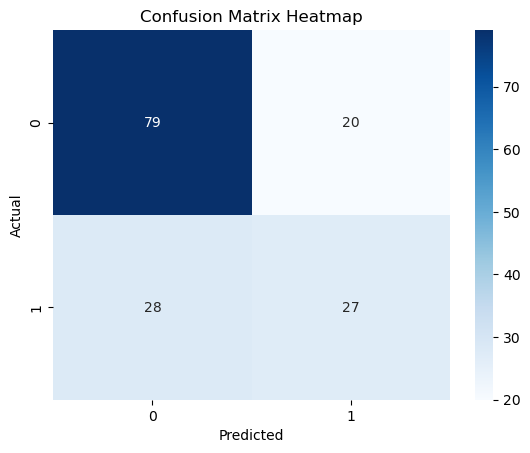

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()